In [4]:
import math
import cv2
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
# import the cv2_imshow function  from patches to use in Google Collab
# import functions from the scipy.signal module for signal processing
from scipy.signal import butter, filtfilt, find_peaks
import scipy.signal as signal
#import and mount the drive module to access files and directories from Google Drive


In [5]:
import cv2
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt
# Carga el clasificador Haarcascade preentrenado para detección de caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Carga el video desde tu computadora a Google Colab
video_filename = "Juan60.mp4"
# Abre el video
cap = cv2.VideoCapture(video_filename)
fps = cap.get(cv2.CAP_PROP_FPS)
fs = round(fps)
print(fs)

60


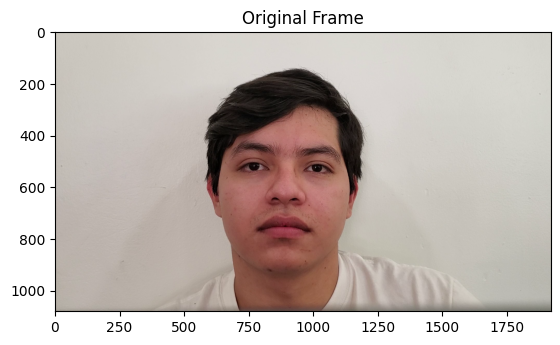

In [27]:
# Asegúrate de que el video se ha abierto correctamente
if not cap.isOpened():
    print("Error al abrir el archivo de video")

# Ir al fotograma número 30
# Como los índices de los fotogramas comienzan en 0, debes restar 1
frame_num = 30 - 1

# Establece la posición actual del archivo de video en el fotograma número 30
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

# Lee el fotograma
ret, frame = cap.read()

# Comprueba si el fotograma se ha leído correctamente
if not ret:
    print("Error al leer el fotograma del video")

# Muestra el fotograma
#cv2.imshow('Frame',frame)

# Convierte la imagen de BGR a RGB para matplotlib
bordered_frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con matplotlib para agregar el título
plt.imshow(bordered_frame_rgb)
plt.title('Original Frame')  # Añadir el título
plt.show()

# No olvides liberar el capturador y cerrar todas las ventanas al final
#cap.release()
#cv2.destroyAllWindows()

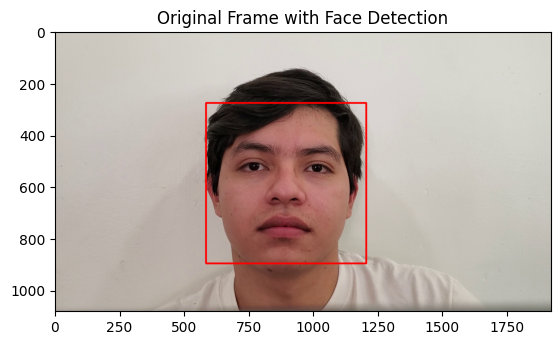

In [28]:
# Asegúrate de que el video se ha abierto correctamente
if not cap.isOpened():
    print("Error al abrir el archivo de video")

# Ir al fotograma número 30
frame_num = 30 - 1  # Los índices de los fotogramas comienzan en 0

# Establece la posición actual del archivo de video en el fotograma número 30
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

# Lee el fotograma
ret, frame = cap.read()

# Comprueba si el fotograma se ha leído correctamente
if not ret:
    print("Error al leer el fotograma del video")
else:
    # Convertir a escala de grises para la detección de rostros
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detectar los rostros en la imagen
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Dibuja un rectángulo alrededor de cada rostro detectado
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 5)

    # Convierte la imagen de BGR a RGB para matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen con matplotlib para agregar el título
    plt.imshow(frame_rgb)
    plt.title('Original Frame with Face Detection')  # Añadir el título
    plt.show()

# Libera el capturador de video
#cap.release()

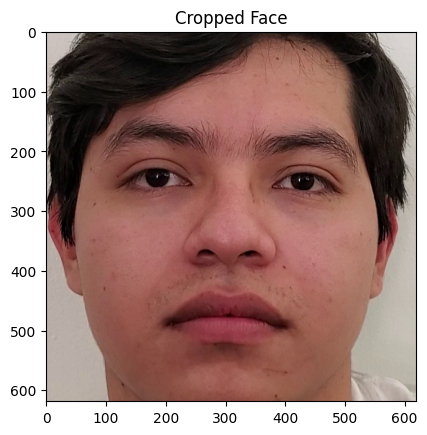

In [29]:
# Asegúrate de que el video se ha abierto correctamente
if not cap.isOpened():
    print("Error al abrir el archivo de video")

# Ir al fotograma número 30
frame_num = 30 - 1  # Los índices de los fotogramas comienzan en 0

# Establece la posición actual del archivo de video en el fotograma número 30
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

# Lee el fotograma
ret, frame = cap.read()

# Comprueba si el fotograma se ha leído correctamente
if not ret:
    print("Error al leer el fotograma del video")
else:
    # Convertir a escala de grises para la detección de rostros
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detectar los rostros en la imagen
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Asumimos que hay al menos un rostro y tomamos el primero para recortar
    if len(faces) > 0:
        # Coordenadas del rostro detectado
        x, y, w, h = faces[0]

        # Recorta el rostro del fotograma
        face_crop = frame[y:y+h, x:x+w]

        # Convierte la imagen de BGR a RGB para matplotlib
        face_crop_rgb = cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen recortada con matplotlib
        plt.imshow(face_crop_rgb)
        plt.title('Cropped Face')  # Añadir el título
        plt.show()
    else:
        print("No se encontraron rostros en el fotograma.")

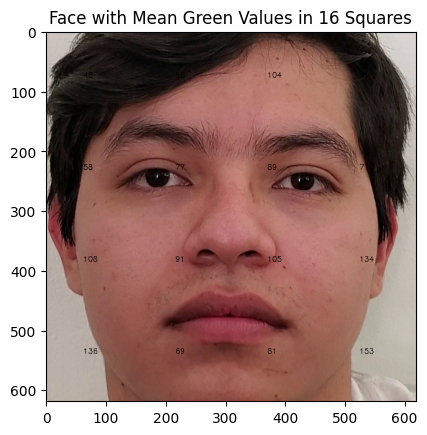

In [30]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Suponiendo que 'face_crop_rgb' es tu imagen recortada de la cara

# Accede al canal verde de la imagen recortada
green_channel = face_crop_rgb[:, :, 1]

# Dimensiones de la imagen recortada
height, width = green_channel.shape

# Número de divisiones por lado (4x4 cuadrados)
n_divisions = 4

# Tamaño de cada cuadrado
square_width = width // n_divisions
square_height = height // n_divisions

# Crea una copia de la imagen para dibujar los valores
image_with_values = np.copy(face_crop_rgb)

# Fuente para el texto
font = cv2.FONT_HERSHEY_SIMPLEX

# Recorre cada cuadrado para calcular el valor medio del canal verde y mostrarlo
for i in range(n_divisions):
    for j in range(n_divisions):
        # Coordenadas del cuadrado
        x_start = j * square_width
        y_start = i * square_height
        x_end = x_start + square_width
        y_end = y_start + square_height

        # Extrae el cuadrado actual del canal verde
        square = green_channel[y_start:y_end, x_start:x_end]

        # Calcula el valor medio del canal verde en el cuadrado
        mean_value = np.mean(square)

        # Calcula el centro del cuadrado para colocar el texto
        center_x = x_start + square_width // 2
        center_y = y_start + square_height // 2

        # Coloca el texto del valor medio en el centro del cuadrado
        cv2.putText(image_with_values, f'{mean_value:.0f}', (center_x - 15, center_y), font, 0.4, (0, 0, 0), 1)

# Muestra la imagen resultante
plt.imshow(image_with_values)
plt.title('Face with Mean Green Values in 16 Squares')
plt.show()


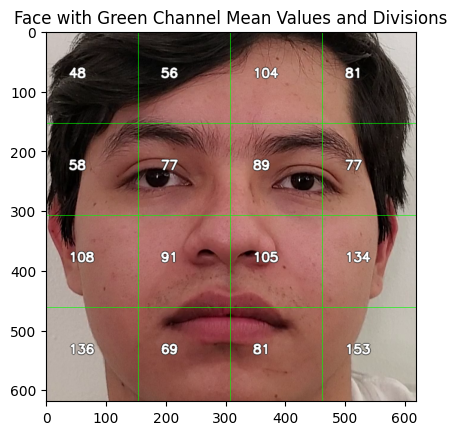

In [31]:

# Accede al canal verde
green_channel = face_crop_rgb[:, :, 1]

# Tamaño de la imagen
height, width = green_channel.shape

# Número de divisiones
n_divisions = 4

# Dimensiones de cada cuadrado
square_height = height // n_divisions
square_width = width // n_divisions

# Crea una copia de la imagen para dibujar
image_with_divisions = np.copy(face_crop_rgb)

# Dibuja las divisiones de los cuadrados
for i in range(1, n_divisions):
    # Líneas verticales
    cv2.line(image_with_divisions, (i * square_width, 0), (i * square_width, height), (0, 255, 0), 1)
    # Líneas horizontales
    cv2.line(image_with_divisions, (0, i * square_height), (width, i * square_height), (0, 255, 0), 1)

# Aumentar el tamaño de la fuente y el grosor para la visibilidad
font_scale = 0.7
font_thickness = 2

# Procesa cada cuadrado para calcular y mostrar el valor medio del canal verde
for y in range(n_divisions):
    for x in range(n_divisions):
        # Calcula los índices del cuadrado
        x_start = x * square_width
        y_start = y * square_height
        square = green_channel[y_start:y_start+square_height, x_start:x_start+square_width]
        
        # Valor medio del canal verde en el cuadrado
        mean_val = np.mean(square)
        
        # Posición para el texto (centrado en el cuadrado)
        text_pos = (x_start + square_width//4, y_start + square_height//2)
        
        # Dibuja el valor medio en el centro del cuadrado con números más grandes, de color blanco con bordes negros
        cv2.putText(image_with_divisions, f'{mean_val:.0f}', text_pos, cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), font_thickness+2, cv2.LINE_AA)
        cv2.putText(image_with_divisions, f'{mean_val:.0f}', text_pos, cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness, cv2.LINE_AA)

# Muestra la imagen
plt.imshow(image_with_divisions)
plt.title('Face with Green Channel Mean Values and Divisions')
plt.show()


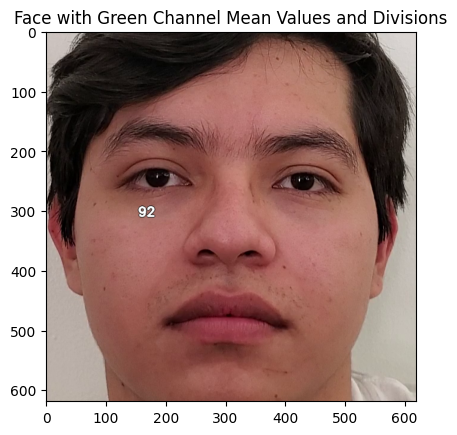

In [34]:

# Accede al canal verde
green_channel = face_crop_rgb[:, :, 1]

# Tamaño de la imagen
height, width = green_channel.shape

# Número de divisiones
n_divisions = 1

# Dimensiones de cada cuadrado
square_height = height // n_divisions
square_width = width // n_divisions

# Crea una copia de la imagen para dibujar
image_with_divisions = np.copy(face_crop_rgb)

# Dibuja las divisiones de los cuadrados
for i in range(1, n_divisions):
    # Líneas verticales
    cv2.line(image_with_divisions, (i * square_width, 0), (i * square_width, height), (0, 255, 0), 1)
    # Líneas horizontales
    cv2.line(image_with_divisions, (0, i * square_height), (width, i * square_height), (0, 255, 0), 1)

# Aumentar el tamaño de la fuente y el grosor para la visibilidad
font_scale = 0.7
font_thickness = 2

# Procesa cada cuadrado para calcular y mostrar el valor medio del canal verde
for y in range(n_divisions):
    for x in range(n_divisions):
        # Calcula los índices del cuadrado
        x_start = x * square_width
        y_start = y * square_height
        square = green_channel[y_start:y_start+square_height, x_start:x_start+square_width]
        
        # Valor medio del canal verde en el cuadrado
        mean_val = np.mean(square)
        
        # Posición para el texto (centrado en el cuadrado)
        text_pos = (x_start + square_width//4, y_start + square_height//2)
        
        # Dibuja el valor medio en el centro del cuadrado con números más grandes, de color blanco con bordes negros
        cv2.putText(image_with_divisions, f'{mean_val:.0f}', text_pos, cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), font_thickness+2, cv2.LINE_AA)
        cv2.putText(image_with_divisions, f'{mean_val:.0f}', text_pos, cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness, cv2.LINE_AA)

# Muestra la imagen
plt.imshow(image_with_divisions)
plt.title('Face with Green Channel Mean Values and Divisions')
plt.show()


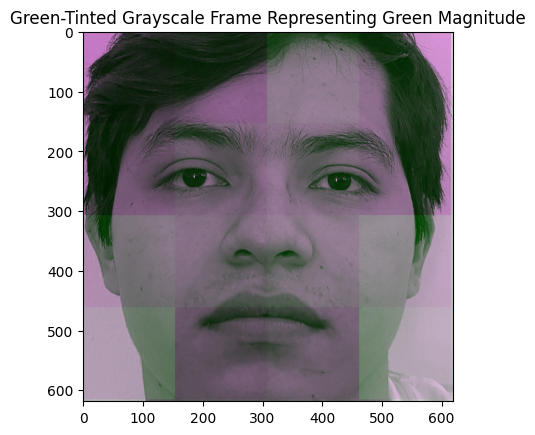

In [36]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Convertir la imagen original a escala de grises
gray_image = cv2.cvtColor(face_crop_rgb, cv2.COLOR_RGB2GRAY)

# Convertir la imagen gris de vuelta a color para mantener los 3 canales
gray_color = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

# Tamaño de la imagen
height, width = face_crop_rgb.shape[:2]

# Crea una copia de la imagen en escala de grises para aplicar el efecto verde
green_tinted_frame = np.copy(gray_color)

# Accede al canal verde de la imagen original para obtener los valores de intensidad
green_channel = face_crop_rgb[:, :, 1]

# Número de divisiones y dimensiones de cada cuadrado
n_divisions = 4
square_height = height // n_divisions
square_width = width // n_divisions

# Aplicar el efecto verde según los valores de intensidad del canal verde
for y in range(n_divisions):
    for x in range(n_divisions):
        x_start = x * square_width
        y_start = y * square_height
        square = green_channel[y_start:y_start+square_height, x_start:x_start+square_width]

        # Valor medio del canal verde en el cuadrado
        mean_val = np.mean(square)
        
        # Mezcla el cuadrado correspondiente con el valor medio de verde, ajustando la intensidad
        green_tinted_frame[y_start:y_start+square_height, x_start:x_start+square_width, 1] = (
            green_tinted_frame[y_start:y_start+square_height, x_start:x_start+square_width, 1] * 0.5 + mean_val * 0.5
        ).astype(np.uint8)

# Muestra la imagen resultante
plt.imshow(green_tinted_frame)
plt.title('Green-Tinted Grayscale Frame Representing Green Magnitude')
plt.show()



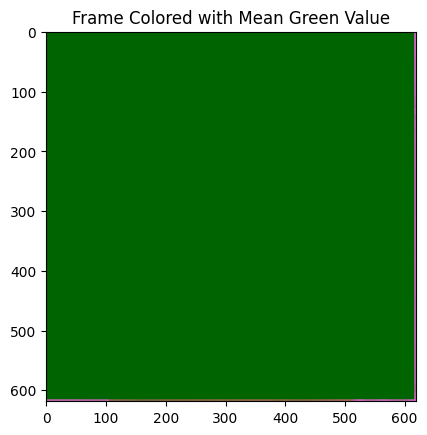

In [21]:
# Calcula el valor medio del canal verde de toda la imagen
mean_green_value = np.mean(green_channel)

# Crea una nueva imagen con el valor medio
mean_colored_frame = np.copy(face_crop_rgb)
mean_colored_frame[:, :, 1] = mean_green_value

# Muestra la imagen con el color verde medio
plt.imshow(mean_colored_frame)
plt.title('Frame Colored with Mean Green Value')
plt.show()


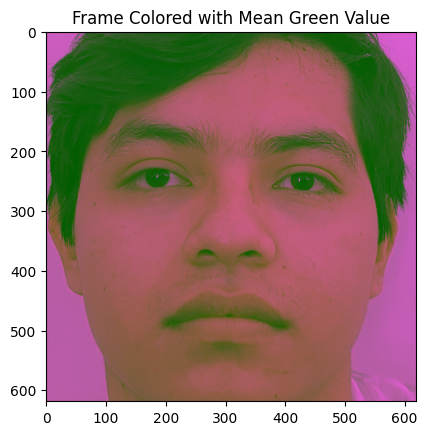

In [35]:
# Calcula el valor medio del canal verde de toda la imagen
mean_green_value = np.mean(green_channel)

# Crea una nueva imagen con el valor medio
mean_colored_frame = np.copy(face_crop_rgb)
mean_colored_frame[:, :, 1] = mean_green_value

# Muestra la imagen con el color verde medio
plt.imshow(mean_colored_frame)
plt.title('Frame Colored with Mean Green Value')
plt.show()


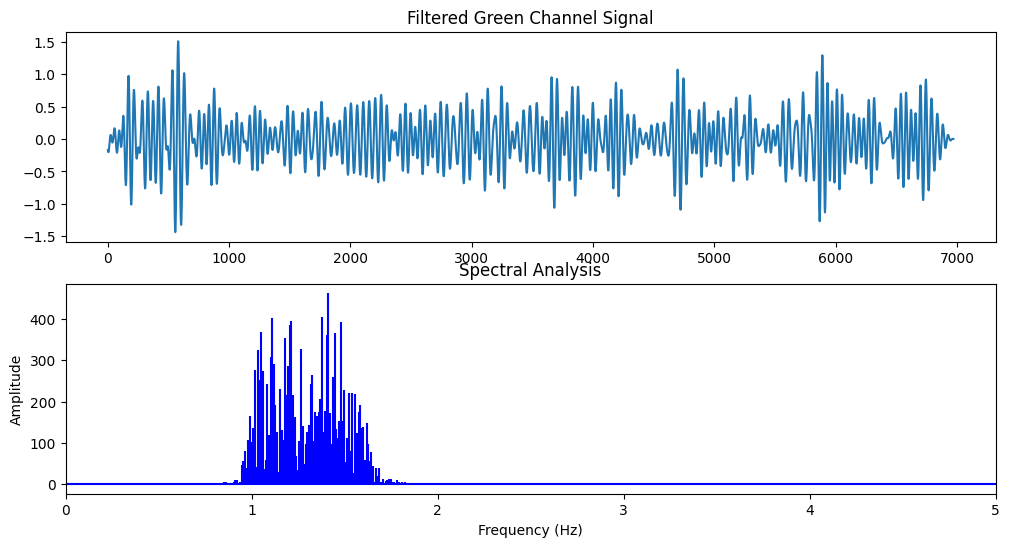

Estimated Heart Rate: 84.7 beats per minute


In [37]:
green_values = []

# Leer el video fotograma a fotograma
while True:
    ret, frame = cap.read()
    if not ret:
        break  # Si no quedan fotogramas, sal del bucle

    # Convertir a escala de grises para la detección de rostros
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detectar rostros
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    if len(faces) > 0:
        x, y, w, h = faces[0]  # Tomar el primer rostro detectado

        # Definir una ROI en la frente
        roi = frame[y:y+h//4, x:x+w]

        # Convertir la ROI a HSV (el canal de saturación puede ser más estable para la detección de cambios en la piel)
        hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv_roi)

        # Calcular la intensidad promedio del canal verde en la ROI
        green_values.append(np.mean(s))

# Convertir la lista de valores verdes a un array de numpy
green_array = np.array(green_values)

# Aplicar un filtro pasa banda para obtener la señal del pulso
# Este paso requiere ajustes según las características del video y el sujeto
from scipy.signal import butter, filtfilt

# Definir la frecuencia de muestreo (fps del video)
fs = cap.get(cv2.CAP_PROP_FPS)
lowcut = 1.0
highcut = 1.6

# Función para crear un filtro pasa banda Butterworth
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Función para aplicar el filtro
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Filtrar la señal
filtered_green = butter_bandpass_filter(green_array, lowcut, highcut, fs, order=5)

# Realizar FFT en la señal filtrada
green_fft = fft(filtered_green)

# Calcular las frecuencias correspondientes
freqs = np.fft.fftfreq(len(filtered_green), 1/fs)

# Encuentra la frecuencia con la magnitud más alta en el rango de la frecuencia cardíaca
idx = np.argmax(np.abs(green_fft))
pulse_freq = freqs[idx]
heart_rate = pulse_freq * 60  # Convertir a latidos por minuto

# Mostrar los resultados
plt.figure(figsize=(12, 6))

# Mostrar la señal temporal filtrada
plt.subplot(2, 1, 1)
plt.plot(filtered_green)
plt.title('Filtered Green Channel Signal')

# Mostrar el espectro de la señal
plt.subplot(2, 1, 2)
plt.stem(freqs, np.abs(green_fft), 'b', markerfmt=" ", basefmt="-b")
plt.title('Spectral Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 5)  # Limitar el eje x al rango de interés para la frecuencia cardíaca
plt.show()

print(f'Estimated Heart Rate: {heart_rate:.1f} beats per minute')

# Libera el capturador de video
#cap.release()

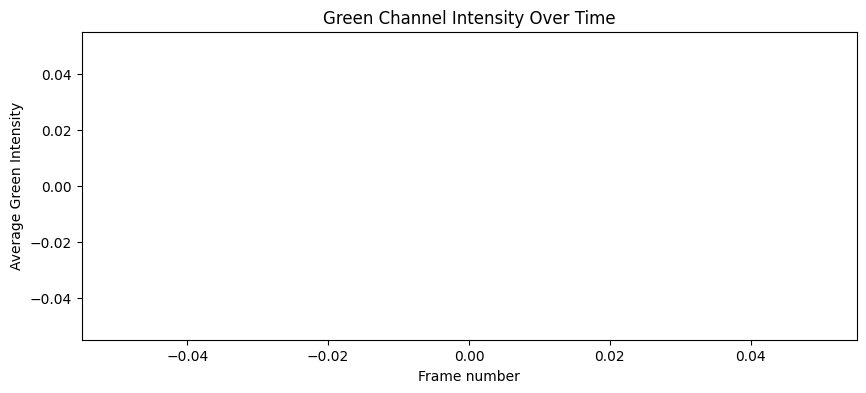

In [38]:

# Inicializar lista para almacenar la intensidad promedio del canal verde
green_values = []

# Leer el video fotograma a fotograma
while True:
    # Captura fotograma por fotograma
    ret, frame = cap.read()
    if not ret:
        break  # Si no quedan fotogramas, sal del bucle

    # Convertir a escala de grises para la detección de rostros
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detectar rostros
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Si se detecta al menos un rostro, proceder a analizarlo
    if len(faces) > 0:
        # Tomar el primer rostro detectado
        x, y, w, h = faces[0]

        # Extraer la región del rostro
        face_region = frame[y:y+h, x:x+w]

        # Calcular la intensidad promedio del canal verde en la ROI
        green_channel = face_region[:, :, 1]
        green_value = np.mean(green_channel)
        green_values.append(green_value)

# Convertir la lista de valores verdes a un array de numpy
green_array = np.array(green_values)

# Mostrar la señal del canal verde
plt.figure(figsize=(10, 4))
plt.plot(green_array, color='green')
plt.title('Green Channel Intensity Over Time')
plt.xlabel('Frame number')
plt.ylabel('Average Green Intensity')
plt.show()


In [48]:
import numpy as np
from scipy.signal import butter, filtfilt, find_peaks

# # Supongamos que tenemos los valores del canal verde en green_values y la tasa de muestreo fs
fs = 60  # Frecuencia de muestreo en Hz (60 cuadros por segundo)

# Paso 1: Filtrado de la señal
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Aplicar filtro pasa banda (0.7 Hz a 4 Hz como ejemplo)
filtered_signal = butter_bandpass_filter(green_values, 0.7, 4, fs, order=5)

# Paso 2: Detección de picos para encontrar latidos
peaks, _ = find_peaks(filtered_signal, distance=fs*0.5)  # Asumiendo al menos 0.5 segundos entre latidos

# Paso 3: Cálculo de Intervalos RR
rr_intervals = np.diff(peaks) / fs  # Convertir a segundos

# Paso 4: Cálculo de la HRV (SDNN)
hrv_sdnn = np.std(rr_intervals)

print(f"HRV (SDNN): {hrv_sdnn} segundos")


HRV (SDNN): 0.13111581912451054 segundos


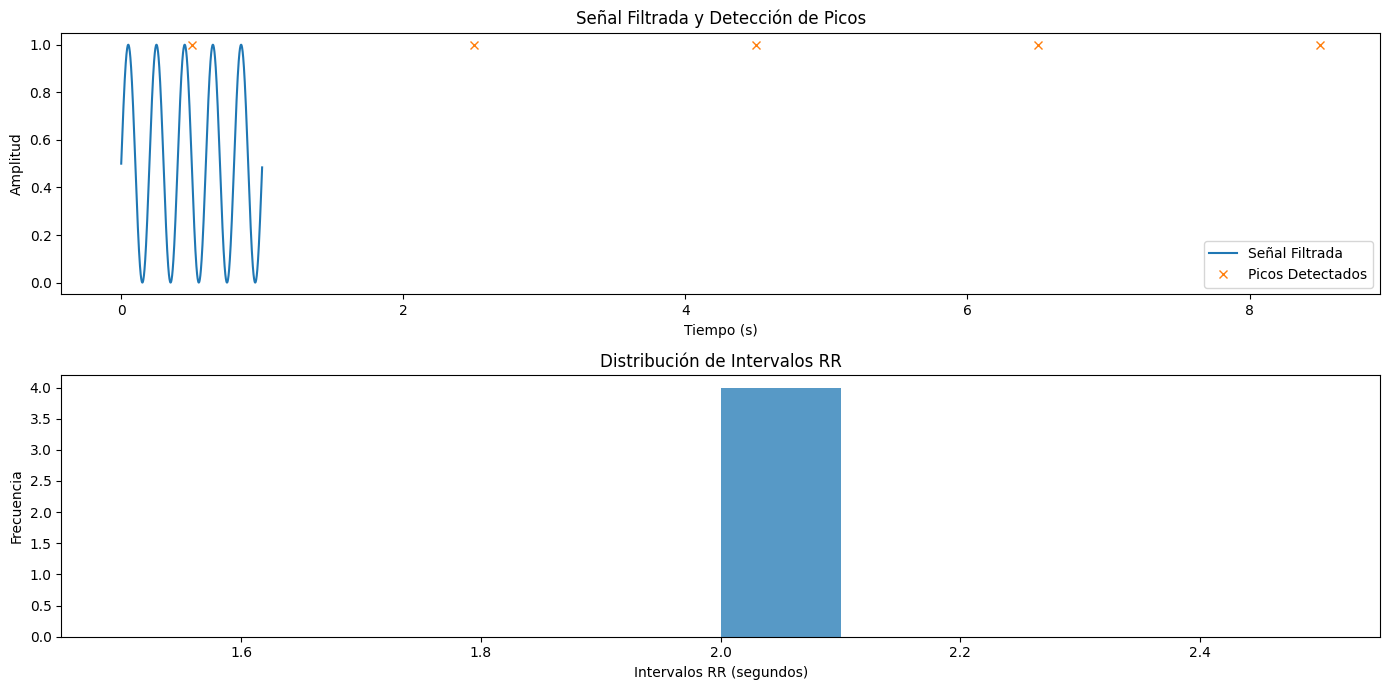

Intervalo Promedio RR: 2.0000 segundos
SDNN: 0.0000 segundos


In [42]:
np.random.seed(42)  # Para resultados reproducibles

# Simulación de una señal de frecuencia cardíaca filtrada (simulando los valores del canal verde filtrados)
t = np.linspace(0, 1, 1000, endpoint=False)
filtered_green = 0.5 * np.sin(2 * np.pi * 5 * t) + 0.5  # 5 Hz de frecuencia cardíaca simulada + offset

# Detección de picos para simular la detección de latidos a partir de la señal filtrada
peaks, _ = find_peaks(filtered_green, height=0.5)

# Cálculo de los intervalos RR (en muestras, para convertir a tiempo real se necesita la frecuencia de muestreo)
rr_intervals_samples = np.diff(peaks)
fs = 100  # Frecuencia de muestreo simulada en Hz
rr_intervals_seconds = rr_intervals_samples / fs  # Conversión de muestras a segundos

# Cálculo del intervalo promedio RR
average_rr_interval = np.mean(rr_intervals_seconds)

# Cálculo del SDNN
sdnn = np.std(rr_intervals_seconds)

# Representación gráfica
plt.figure(figsize=(14, 7))

# Señal filtrada y picos detectados
plt.subplot(2, 1, 1)
plt.plot(t, filtered_green, label='Señal Filtrada')
plt.plot(peaks/fs, filtered_green[peaks], 'x', label='Picos Detectados')
plt.title('Señal Filtrada y Detección de Picos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

# Histograma de intervalos RR
plt.subplot(2, 1, 2)
plt.hist(rr_intervals_seconds, bins=10, alpha=0.75)
plt.title('Distribución de Intervalos RR')
plt.xlabel('Intervalos RR (segundos)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Mostrar los resultados calculados
print(f'Intervalo Promedio RR: {average_rr_interval:.4f} segundos')
print(f'SDNN: {sdnn:.4f} segundos')

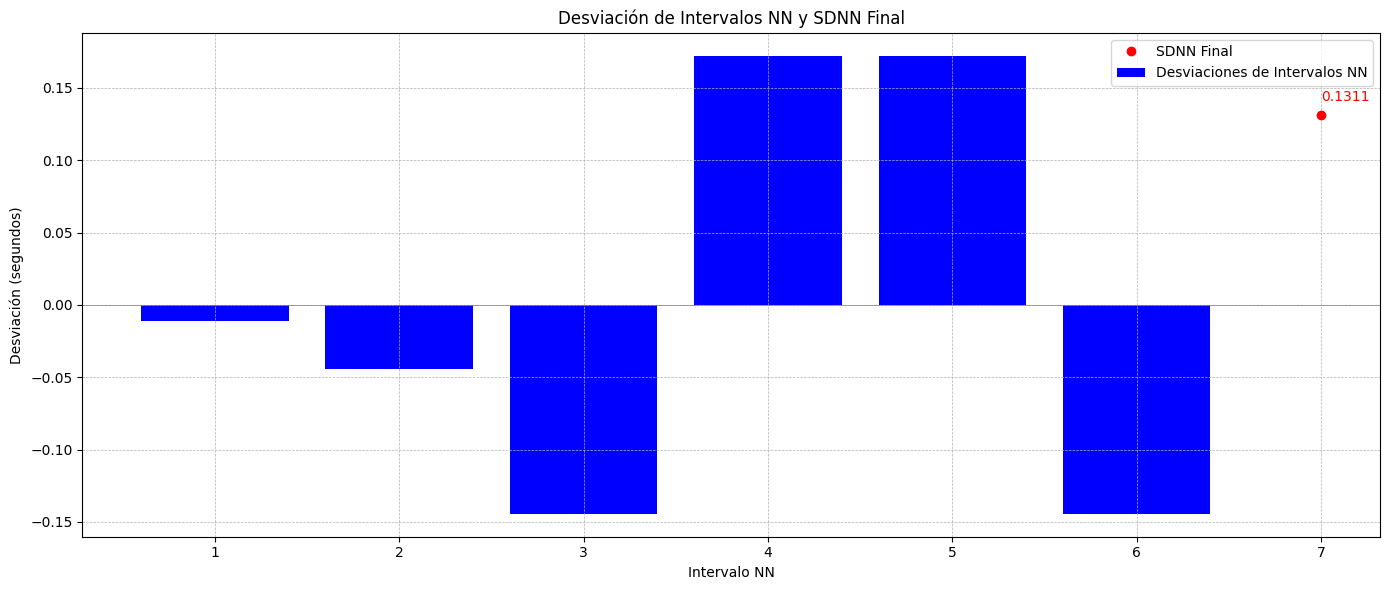

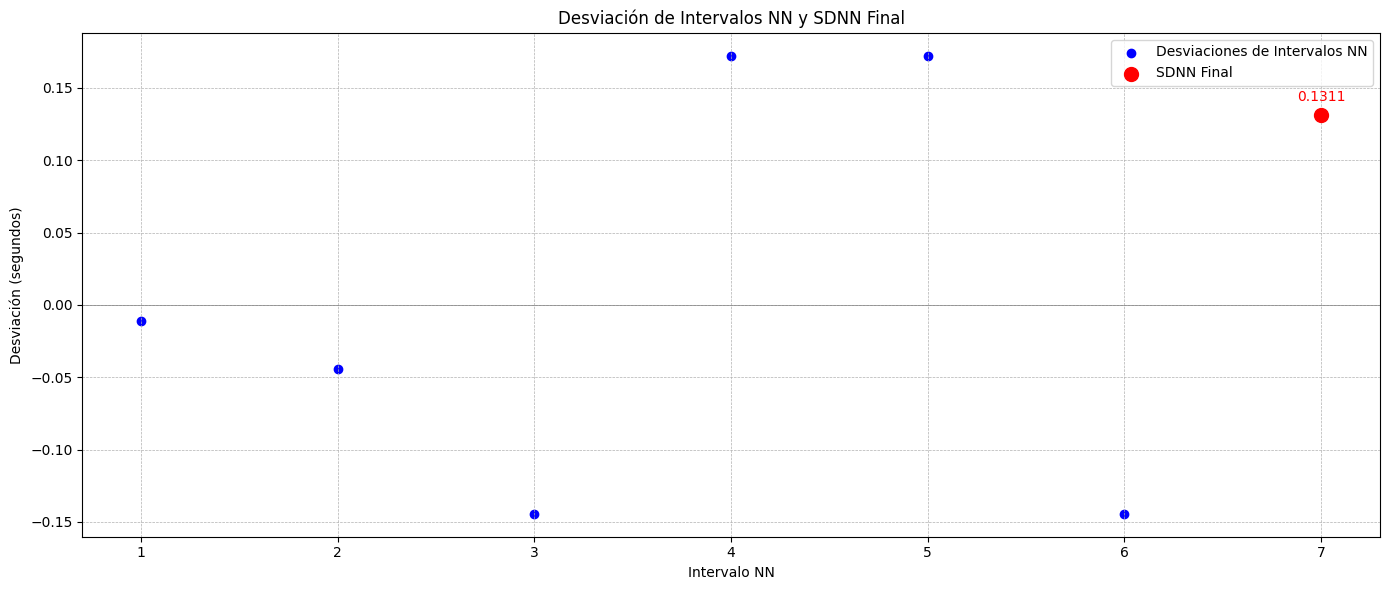

In [50]:
mean_rr = np.mean(rr_intervals)
deviations_from_mean = rr_intervals - mean_rr

# Calcular la posición en el eje x para el punto de SDNN final
x_pos_sdnn = len(deviations_from_mean) + 1  # Posición después del último intervalo para destacar el SDNN final

# Graficar las desviaciones de los intervalos NN y el SDNN final
plt.figure(figsize=(14, 6))
plt.bar(range(1, len(rr_intervals) + 1), deviations_from_mean, color='blue', label='Desviaciones de Intervalos NN')
plt.plot(x_pos_sdnn, hrv_sdnn, 'ro', label='SDNN Final')  # Punto rojo para el SDNN
plt.text(x_pos_sdnn, hrv_sdnn + 0.01, f'{hrv_sdnn:.4f}', color='red')  # Texto indicador del valor de SDNN
plt.axhline(0, color='gray', lw=0.5)  # Línea en y=0 para referencia
plt.title('Desviación de Intervalos NN y SDNN Final')
plt.xlabel('Intervalo NN')
plt.ylabel('Desviación (segundos)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.scatter(range(1, len(rr_intervals) + 1), deviations_from_mean, color='blue', label='Desviaciones de Intervalos NN')
plt.scatter(x_pos_sdnn, hrv_sdnn, color='red', s=100, zorder=5, label='SDNN Final')  # Punto rojo más grande para el SDNN
plt.text(x_pos_sdnn, hrv_sdnn + 0.01, f'{hrv_sdnn:.4f}', color='red', ha='center')  # Texto indicador del valor de SDNN
plt.axhline(0, color='gray', lw=0.5)  # Línea en y=0 para referencia
plt.title('Desviación de Intervalos NN y SDNN Final')
plt.xlabel('Intervalo NN')
plt.ylabel('Desviación (segundos)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [51]:
#------Compare to the heart rate calculated from pulse oximeter measurements------
import pandas as pd
# import the pulse oximeter .csv file
data_video= pd.read_csv('juan_60_20230429154535.csv')

# extract the data from the PULSE column
pulse_signal = data_video['PULSE']

# eliminate the first 10 seconds and and take the next 60 values of the signal
pulse_signal = pulse_signal[47:107]

# print the size of the signal (must be 60 for 60 seconds)
print("Signal size:", pulse_signal.size)

# calculate and print the average value of the Heart Rate
heart_rate_csv = np.mean(pulse_signal)
print("\nHeart rate: {:.2f} bpm".format(heart_rate_csv))

# calculate and print the error
error=abs(heart_rate-heart_rate_csv)
print("\nError: {:.2f} bpm".format(error))

Signal size: 60

Heart rate: 85.35 bpm

Error: 0.67 bpm


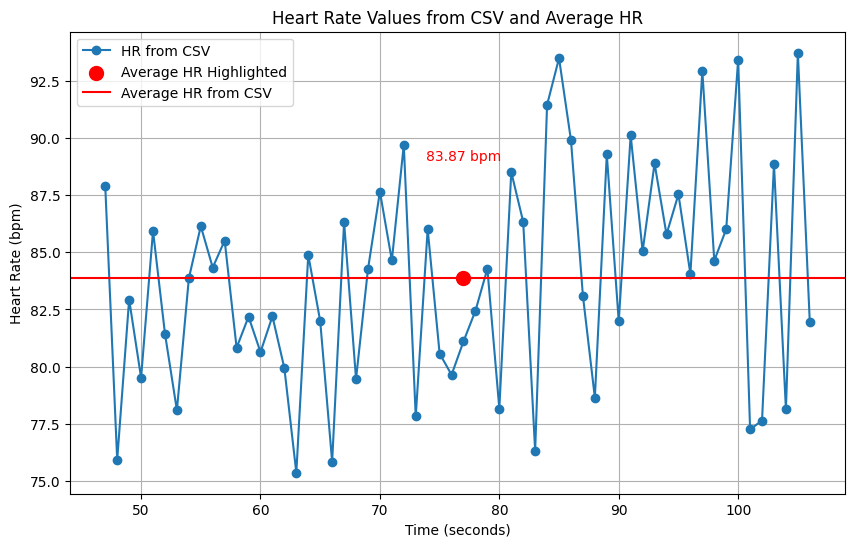

In [58]:

plt.figure(figsize=(10, 6))
plt.plot(pulse_signal_true.index, pulse_signal_true, label='HR from CSV', linestyle='-', marker='o')
plt.scatter(pulse_signal_true.index[len(pulse_signal_true) // 2], heart_rate_csv, color='red', s=100, label='Average HR Highlighted')
plt.axhline(y=heart_rate_csv, color='r', linestyle='-', label='Average HR from CSV')
plt.annotate(f'{heart_rate_csv:.2f} bpm', xy=(pulse_signal_true.index[len(pulse_signal_true) // 2], heart_rate_csv), xytext=(pulse_signal_true.index[len(pulse_signal_true) // 2], heart_rate_csv + 5), color='red', ha='center', va='bottom')
plt.title('Heart Rate Values from CSV and Average HR')
plt.xlabel('Time (seconds)')
plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.grid(True)
plt.show()

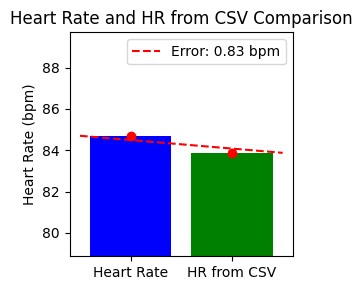

Error between video HR and CSV HR: 0.83 bpm


In [64]:
# Crear una pequeña ventana para mostrar el cálculo del error
fig, ax = plt.subplots(figsize=(3, 3))  # Ventana más pequeña
ax.bar(['Heart Rate', 'HR from CSV'], [heart_rate, heart_rate_csv], color=['blue', 'green'])
ax.plot([-0.5, 1.5], [heart_rate, heart_rate_csv], 'r--', label=f'Error: {error:.2f} bpm')
ax.scatter([0, 1], [heart_rate, heart_rate_csv], color='red', zorder=5)  # Puntos para HR y HR del CSV
ax.set_ylim(min(heart_rate, heart_rate_csv) - 5, max(heart_rate, heart_rate_csv) + 5)
ax.set_ylabel('Heart Rate (bpm)')
ax.set_title('Heart Rate and HR from CSV Comparison')
ax.legend()

plt.tight_layout()
plt.show()

print(f"Error between video HR and CSV HR: {error:.2f} bpm")

